<a href="https://colab.research.google.com/github/Galahexolion/Giliojo-mokymo-sistem-taikymai/blob/main/lab2/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# --- 1 ŽINGSNIS: DUOMENŲ PARUOŠIMAS (Iš Lab 1, kad Lab 2 veiktų) ---

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotekos duomenų paruošimui
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Bibliotekos Lab 2 modeliams (pagal paskaitų skaidres)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Vertinimo metrikos
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Įkeliame (jei failas jau įkeltas į Colab)
df = pd.read_csv('Titanic.csv')

# 2. Tvarkome trūkstamas reikšmes
imputer_age = SimpleImputer(strategy='median')
df['Age'] = imputer_age.fit_transform(df[['Age']])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop('Cabin', axis=1, inplace=True)

# 3. Šaliname nereikalingus ir koduojame
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# 4. Šaliname išskirtis (Outliers) iš 'Fare'
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Fare'] >= (Q1 - 1.5 * IQR)) & (df['Fare'] <= (Q3 + 1.5 * IQR))]

# 5. Daliname ir Normalizuojame
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fit tik ant train
X_test_scaled = scaler.transform(X_test)       # Transform ant test

print("Duomenys paruošti Lab 2 užduotims.")
print(f"Mokymo aibė: {X_train_scaled.shape}")

Duomenys paruošti Lab 2 užduotims.
Mokymo aibė: (620, 8)


In [5]:
# --- 2 ŽINGSNIS: LAB 02 UŽDUOTYS (MODELIAVIMAS) ---

# Sukuriame modelių sąrašą pagal teorinę medžiagą
# 1. Logistinė regresija (Bazinis modelis)
# 2. KNN (K-Nearest Neighbors) - čia parenkame k=5
# 3. Sprendimų medis (Decision Tree) - ribojame gylį, kad nepersimokytų
# 4. Naivusis Bajesas (Naive Bayes) - tinka tikimybių skaičiavimui
# 5. SVM (Support Vector Machine) - ieško geriausios skiriančios plokštumos

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree (depth=5)": DecisionTreeClassifier(max_depth=5),
    "Naive Bayes": GaussianNB(),
    "SVM (RBF Kernel)": SVC(kernel='rbf')
}

# Saugosime rezultatus palyginimui
results = {}

print("\n=== MODELIŲ REZULTATAI ===")

for name, model in models.items():
    # Apmokymas
    model.fit(X_train_scaled, y_train)

    # Prognozavimas
    y_pred = model.predict(X_test_scaled)

    # Vertinimas (Accuracy)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"{name:25} | Tikslumas: {acc:.4f}")

# Išrenkame geriausią
best_model_name = max(results, key=results.get)
print(f"\nGeriausiai pasirodė: {best_model_name} ({results[best_model_name]:.4f})")


=== MODELIŲ REZULTATAI ===
Logistic Regression       | Tikslumas: 0.7548
KNN (k=5)                 | Tikslumas: 0.7355
Decision Tree (depth=5)   | Tikslumas: 0.7677
Naive Bayes               | Tikslumas: 0.7419
SVM (RBF Kernel)          | Tikslumas: 0.7677

Geriausiai pasirodė: Decision Tree (depth=5) (0.7677)



--- Detali analizė modeliui: Decision Tree (depth=5) ---
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        95
           1       0.72      0.65      0.68        60

    accuracy                           0.77       155
   macro avg       0.76      0.75      0.75       155
weighted avg       0.77      0.77      0.77       155



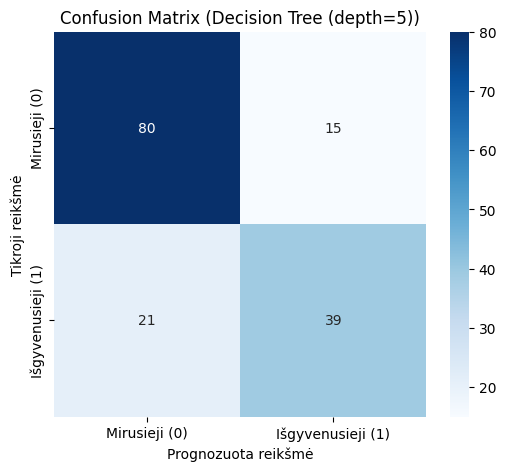

In [6]:
# --- 3 ŽINGSNIS: DETALI GERIAUSIO MODELIO ANALIZĖ ---

print(f"\n--- Detali analizė modeliui: {best_model_name} ---")
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)

# Klasifikavimo ataskaita (Precision, Recall, F1-score)
# Tai svarbu, nes vien tikslumo (Accuracy) neužtenka, jei klasės nesubalansuotos
print(classification_report(y_test, y_pred_best))

# Confusion Matrix (Klaidų matrica) vizualizacija
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Mirusieji (0)', 'Išgyvenusieji (1)'],
            yticklabels=['Mirusieji (0)', 'Išgyvenusieji (1)'])
plt.xlabel('Prognozuota reikšmė')
plt.ylabel('Tikroji reikšmė')
plt.title(f'Confusion Matrix ({best_model_name})')
plt.show()